START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
# mpld3.enable_notebook()

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Pesticide, soil type and runoff calibration parameter.  

In [2]:
# Soil and pesticide
pesticide = 'Zinc'
soil_type = 'Crop Soil'
soil = 'Alteck'
soil_short = 'Crop'

pesti_obs = choose_pesticide(
    pesticide,
    soil)

# Kd ranges to test
Kd_pest_sterile = pesti_obs[0]
Kd_pest_living = pesti_obs[1]

# Initial concentrations and mass out observed
pest_dict_S_1st = pesti_obs[2]
pest_dict_L_1st = pesti_obs[3]
pest_dict_S_2nd = pesti_obs[4]
pest_dict_L_2nd = pesti_obs[5]

# Assumed (used to calculate Reynolds number)
runoff_vel = 10.0  # mm/min

### Microcosm

In [3]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
soil_height1 = 20  # Mixing layer depth in mm
soil_height2 = 20  # mm

### Soil hydrological characteristics

In [4]:
if soil == 'Alteck':
    kSat = 2.24  # mm/min (13.45 cm/h - Crop Soil) 
    psi = 1100  # soil suction Alteck (mm)
elif soil == 'Rouff': 
    kSat = 17.62*10/60  # mm/min (17.62 cm/h - Vine Soil) 
    psi = 1100  # soil suction Alteck (mm)
    
# Soil characteristics (Equivalent for Alteck and Rouffach)
# Initial bulk density options:
pb_i0 = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3  (M. Trautmann)
pb_i1 = 2.61/10**3 # inital 1st pulse, calc. from experiment cond.
pb_i2 = 3.59/10**3 # initial 2nd pulse, calc. from experiment cond.

# Final bulk density options (1st and 2nd pulses)
pb_f1 = 3.59/10**3 # final1, calculated from experimental conditions.
pb_f2 = 3.76/10**3 # final2, calculated from experimental conditions.

### Store results

In [5]:
output_hydro_params = {
    soil_short : [{'R1_FA':[],
              'R2_ALL':[],
              'Err1':[{'Fresh':[], 'Aged':[]}],
              'Err2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}],
              'Ksat2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}]
             }]
    }

In [6]:
output_pesti_params = {
    soil_short: {'R1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'R2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Err1': {'SF': [], 'SA': [], 'LF': [], 'LA': []},
                 'Err2': {'SF': [], 'SA': [], 'LF': [], 'LA': []},
                 'Koc1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Koc2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'logKd1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'logKd2': {'SF': None, 'SA': None, 'LF': None, 'LA': None}
                 }
}

## Hydrology - 1st pulse

#### Computation

In [7]:
water_data = leachsim(kSat = kSat,
                      soil_height=soil_height1,
                      soil = 'Alteck',
                      psi=psi)

Mass balance True
Mass balance 0.0
Mass balance 0.0


In [8]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    soil = 'Alteck',
    isAGED = False,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = False)


FRESH
--------------------------------------------
ksat high:  13.440000000000001 cm/h
ksat med12:  13.440000000000001 cm/h
ksat med30:  13.440000000000001 cm/h
ksat low:  13.440000000000001 cm/h
--------------------------------------------
R2:  0.967591161606
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -1.6576800421
55 mm/h - 12min  3.80968602754
55 mm/h - 30min  -4.16283710639
30 mm/h - 30min  -21.305808952
--------------------------------------------
Mass balance:  True True True True


In [9]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    soil = 'Alteck',
    isAGED = True,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = True)

AGED
--------------------------------------------
ksat high:  13.440000000000001 cm/h
ksat med12:  13.440000000000001 cm/h
ksat med30:  13.440000000000001 cm/h
ksat low:  13.440000000000001 cm/h
--------------------------------------------
R2:  0.942064837787
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -9.94976957607
55 mm/h - 12min  -35.8910849727
55 mm/h - 30min  -8.50907325802
30 mm/h - 30min  -30.5302507367
--------------------------------------------
Mass balance:  True True True True


In [10]:
title = "Percolated Volume [mL] - " + str(soil_type) + "1st Pulse"

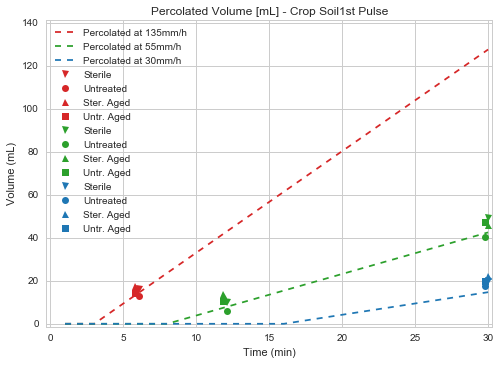

In [11]:
extract_and_plothydro(
    water_data,
    "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h", "NA",
    title,
    soil,
    isFirstCycle = True,
    isPercolation = True
)

In [12]:
hydro1 = extract(
    water_data, 
    isFirstCycle = True
)

percol_data1 = hydro1[0]
runoff_data1 = hydro1[1]
time_sizes1 = hydro1[2]

## Transport - 1st pulse

### Computation transport - 1st pulse

#### Test factor X (Sterile)

In [13]:
x = 2

In [14]:
pest_sterile_1st = pest_linear_x(
    Kd_pest_sterile,
    x,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_pest(
        pest_sterile_1st,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)

ValueError: not enough values to unpack (expected 6, got 3)

#### Test factor X (Living)

In [ ]:
x = 2

In [ ]:
pest_living_1st = pest_linear_x(
    Kd_pest_living,
    x,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, percol_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    KFILM = True,
    isFirstCycle = True,
    isLiving = True)


output_pesti_params = extract_goodness_pest(
        pest_living_1st,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

#### Time series

In [ ]:
data_stack = pest_sterile_1st['Data_stack']
sterile1 = extract_pest(data_stack)

mass_percol_sterile1 = sterile1[0]
mass_pond_sterile1 = sterile1[1]

In [ ]:
data_stack = pest_living_1st['Data_stack']
living1 = extract_pest(data_stack)

mass_percol_living1 = living1[0]
mass_pond_living1 = living1[1]

## Plotting transport

### Sterile (1st Pulse, Crop Soil)

In [ ]:
pestiplot_condition(
    mass_percol_sterile1,
    pest_dict_S_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Crop Soil)

In [ ]:
pestiplot_condition(
    mass_percol_living1,
    pest_dict_L_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [ ]:
water2_ktest = leachsim3(
    soil,
    kSat = [
        kSat/25, kSat/50,  kSat/75, 
        kSat/100, kSat/125, kSat/150, 
        kSat/175, kSat/200, kSat/250,
        kSat/350, kSat/500, kSat/700, kSat/1000],
    soil_height=soil_height2,
    isFirstCycle = False
)

output_hydro_params = extract_goodness(
    water2_ktest,
    output_hydro_params,
    soil_short,
    isFirstCycle = False,
    isAGED = None
)

### Percolation - 2nd pulse

In [ ]:
title = "Percolated Volume [mL] - " + str(soil_type) +  " 2nd Pulse"

In [ ]:
extract_and_plothydro(
    water2_ktest,
    "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = True
)

### Ponding - 2nd pulse

In [ ]:
title = "Ponded Volume [mL] [mL] - " + str(soil_type) +  " 2nd Pulse"

In [ ]:
extract_and_plothydro(
    water2_ktest,
    "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = False
)

In [ ]:
hydro2 = extract(
    water2_ktest,
    isFirstCycle = False
)
percol_data2 = hydro2[0]
runoff_data2 = hydro2[1]
time_sizes2 = hydro2[2]

## Transport - 2nd pulse

### Computation transport - 2nd Pulse

#### Kd optimal (sterile)

In [ ]:
x = 2

In [ ]:
pest_sterile_2nd = pest_linear_x(
    Kd_pest_sterile,
    x,
    pest_dict_S_2nd,
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    soil = "Alteck",
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_pest(
        pest_sterile_2nd,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

#### Kd optimal (living)

In [ ]:
x = 2

In [ ]:
pest_living_2nd = pest_linear_x(
    Kd_pest_living,
    x,
    pest_dict_L_2nd,          
    pb_i1, pb_f1,
    percol_data2, runoff_data2,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_pest(
        pest_living_2nd,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

#### Time series

In [ ]:
data_stack = pest_sterile_2nd['Data_stack']
sterile2 = extract_pest(data_stack)

data_stack = pest_living_2nd['Data_stack']
living2 = extract_pest(data_stack)

mass_percol_sterile2 = sterile2[0]
mass_pond_sterile2 = sterile2[1]

mass_percol_living2 = living2[0]
mass_pond_living2 = living2[1]

## Plotting transport 

### Sterile (2nd Pulse)

In [ ]:
pestiplot_condition(
    mass_percol_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

In [ ]:
pestiplot_condition(
    mass_pond_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse)

In [ ]:
pestiplot_condition(
    mass_percol_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

In [ ]:
pestiplot_condition(
    mass_pond_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

In [ ]:
import pprint

In [ ]:
pprint.pprint(output_hydro_params)

In [ ]:
pprint.pprint(output_pesti_params)

END NOTEBOOK